<a href="https://colab.research.google.com/github/kghilothia06/recommender_system/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
movie_title_id = pd.read_csv('/content/drive/My Drive/recommender_system_dataset/Project 8/Movie_Id_Titles')

In [3]:
movie_title_id.shape

(1682, 2)

In [4]:
movie_title_id.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [0]:
movie_rating =  pd.read_csv('/content/drive/My Drive/recommender_system_dataset/Project 8/u.data',sep='\t',names = ['user_id' , 'movie_id' , 'rating' , 'timestamp'])

In [6]:
movie_rating.shape

(100003, 4)

In [7]:
movie_rating.head()

,user_id,movie_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


dropping timestamp column


In [0]:
movie_rating.drop(['timestamp'],axis=1 , inplace=True)

In [9]:
movie_rating.shape

(100003, 3)

In [10]:
movie_rating.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [11]:
movie_rating.describe()

,user_id,movie_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [12]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
user_id     100003 non-null int64
movie_id    100003 non-null int64
rating      100003 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


MERGING THE 2 Datasets 

In [0]:
movie_rating_combined = pd.merge(movie_rating, movie_title_id  , left_on='movie_id' , right_on = 'item_id')

In [14]:
movie_rating_combined.shape

(100003, 5)

In [15]:
movie_rating_combined.head()

,user_id,movie_id,rating,item_id,title
0,0,50,5,50,Star Wars (1977)
1,290,50,5,50,Star Wars (1977)
2,79,50,4,50,Star Wars (1977)
3,2,50,5,50,Star Wars (1977)
4,8,50,5,50,Star Wars (1977)


In [0]:
movie_rating_combined.drop(['item_id'] , axis= 1, inplace=True)

In [17]:
movie_rating_combined.shape

(100003, 4)

# **DATA VISUALIZATION**

GROUPING the dataset by title of the movies

In [18]:
movie_rating_combined.groupby('title').describe()

user_id              ... rating     
                                        count        mean  ...    75%  max
title                                                      ...            
'Til There Was You (1997)                 9.0  383.777778  ...    3.0  4.0
1-900 (1994)                              5.0  477.000000  ...    4.0  4.0
101 Dalmatians (1996)                   109.0  450.330275  ...    4.0  5.0
12 Angry Men (1957)                     125.0  453.552000  ...    5.0  5.0
187 (1997)                               41.0  517.097561  ...    4.0  5.0
...                                       ...         ...  ...    ...  ...
Young Guns II (1990)                     44.0  504.068182  ...    3.0  5.0
Young Poisoner's Handbook, The (1995)    41.0  452.487805  ...    4.0  5.0
Zeus and Roxanne (1997)                   6.0  532.833333  ...    3.0  3.0
unknown                                   9.0  311.888889  ...    4.0  5.0
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000  ...    3.0  3.0

[1664 rows x 24 columns]

In [19]:
movie_rating_combined.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


extracting 'mean' and 'count' from above description of dataset

In [0]:
rating_mean_df = movie_rating_combined.groupby('title')['rating'].describe()['mean']

In [0]:
rating_count_df = movie_rating_combined.groupby('title')['rating'].describe()['count']

In [22]:
#no. of times eacch movei has been rated
rating_count_df

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [23]:
#mean rating of every movie
rating_mean_df

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

Merging the 2 datsets of mean and count of each movie

In [0]:
rating_mean_count_combined = pd.merge(rating_mean_df , rating_count_df , on='title')

In [25]:
rating_mean_count_combined

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0
...,...,...
Young Guns II (1990),2.772727,44.0
"Young Poisoner's Handbook, The (1995)",3.341463,41.0
Zeus and Roxanne (1997),2.166667,6.0


In [26]:
rating_mean_count_combined.reset_index()

,title,mean,count
0,'Til There Was You (1997),2.333333,9.0
1,1-900 (1994),2.600000,5.0
2,101 Dalmatians (1996),2.908257,109.0
3,12 Angry Men (1957),4.344000,125.0
4,187 (1997),3.024390,41.0
...,...,...,...
1659,Young Guns II (1990),2.772727,44.0
1660,"Young Poisoner's Handbook, The (1995)",3.341463,41.0
1661,Zeus and Roxanne (1997),2.166667,6.0
1662,unknown,3.444444,9.0


plotting histograms for mean and count columns

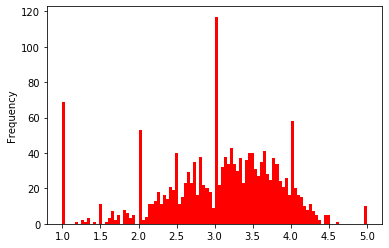

In [30]:
rating_mean_count_combined['mean'].plot(bins=100 , kind='hist' ,color='r')
plt.show()

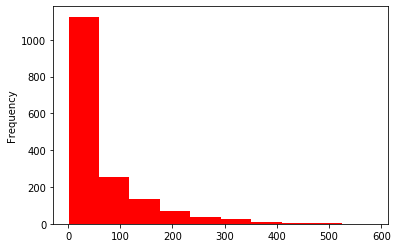

In [32]:
rating_mean_count_combined['count'].plot(bins=10 , kind = 'hist' , color = 'r')

getting movies with mean=5

In [43]:
rating_mean_count_combined[rating_mean_count_combined['mean'] == 5]

,mean,count
title,,
Aiqing wansui (1994),5.0,1.0
Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
Prefontaine (1997),5.0,3.0
"Saint of Fort Washington, The (1993)",5.0,2.0
Santa with Muscles (1996),5.0,2.0
Someone Else's America (1995),5.0,1.0
Star Kid (1997),5.0,3.0


getting most reviewed movies by sorting the dataset

In [46]:
rating_mean_count_combined.sort_values('count' , ascending = False).head(100)

,mean,count
title,,
Star Wars (1977),4.359589,584.0
Contact (1997),3.803536,509.0
Fargo (1996),4.155512,508.0
Return of the Jedi (1983),4.007890,507.0
Liar Liar (1997),3.156701,485.0
...,...,...
Aladdin (1992),3.812785,219.0
Babe (1995),3.995434,219.0
Volcano (1997),2.808219,219.0
